### Loading Data

In [1740]:
file_path=os.path.join('static', 'data', 'data.csv')

In [1811]:
df=pd.read_csv(file_path)
df=df.drop(['Course Name', 'Submission Date'], axis=1)
df['Student Name']=df['Student Name'].astype('str')
df=df[~df['Student Name'].isin(['Olivia Booth', 'Natasha Albert'])]#, 'Test 1', 'Test 2'])]
df=df[~df['Student Name'].isin(['33', '16'])]
df=df[~df['Week'].isin([4, 5])]
time_map={'0-5 hrs': 5, 
        '6-10 hrs': 4, 
        '11-15 hrs': 3, 
        '15-20 hrs': 2, 
        '+20 hrs': 1}
df['Outside Time Spent']=df['Outside Time Spent'].map(time_map)
df
# df.dtypes

,Week,Student Name,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating,Outside Time Spent
0,1,1,3,3,4,4,4,3,3,3,2
1,1,2,4,4,4,4,4,5,5,0,4
2,1,3,4,4,5,4,5,5,4,0,4
3,1,4,4,2,3,5,4,5,4,3,5
4,1,5,5,3,5,5,5,5,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...
480,13,4,5,4,4,3,4,4,4,5,3
481,13,36,5,3,5,5,5,5,5,5,1
482,13,35,2,3,4,1,3,1,3,4,3
483,13,38,4,4,4,4,4,4,4,4,4


In [1411]:
feature_columns=['Overall Satisfaction', 'Class Pace', 
                 'Academic Support', 'Apply Learning Outside Class', 
                 'Instructor Engagement', 'Instructor Clarity', 
                 'Instructor Knowledge', 'Homework Feedback Rating']#, 
#                  'Outside Time Spent']
df[feature_columns]=df[feature_columns].astype('int32')

### Jitter Function for Scatter Plots

In [1412]:
def rand_jitter(arr, scale=.1):
    stdev = scale * (max(arr) - min(arr))
    if stdev>0: 
        return arr + np.random.randn(len(arr)) * stdev
    else: 
        return arr + np.random.randn(len(arr)) * scale

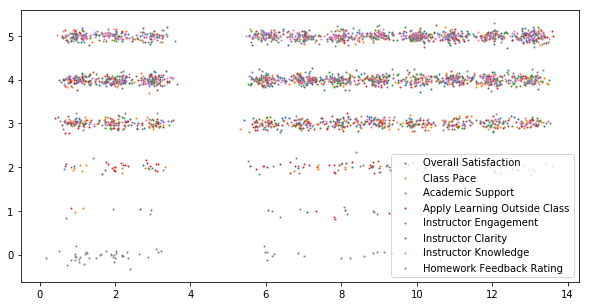

In [1413]:
plt.figure(figsize=(10, 5))
for idx, each_metric in enumerate(feature_columns): 
    stacked_df=df[['Week', each_metric]]
#     stacked_df=df.dropna().drop('Student Name', axis=1).set_index('Week').unstack()#.columns='Value'
#     stacked_df=stacked_df.reset_index()
#     stacked_df.columns=['Metric', 'Week', 'Value']
    plt.scatter(x=rand_jitter(stacked_df['Week'], 0.02), 
                y=rand_jitter(stacked_df[each_metric], 0.02), 
                s=1)#, c=['Metric'], s=0.01)
plt.legend()
plt.show()

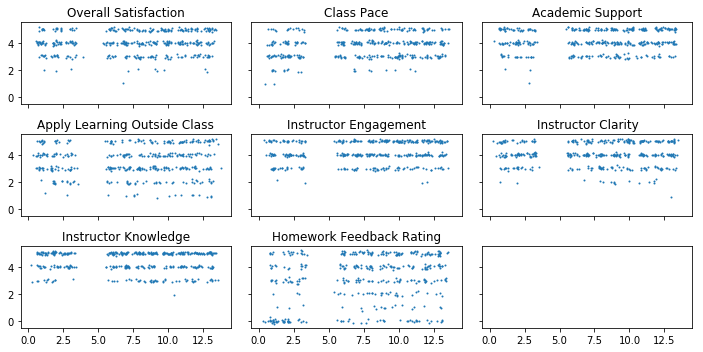

In [1414]:
fig, ax=plt.subplots(3, 3, figsize=(10, 5), sharey=True, sharex=True)
for idx, each_metric in enumerate(feature_columns): 
    stacked_df=df[['Week', each_metric]]
    curr_ax=ax[math.floor(idx/3)][idx%3]
#     stacked_df=metric_df.dropna().set_index('Week').unstack()#.columns='Value'
#     stacked_df=df.dropna().drop('Student Name', axis=1).set_index('Week').unstack()#.columns='Value'
#     stacked_df=stacked_df.reset_index()
#     stacked_df.columns=['Metric', 'Week', 'Value']
    curr_ax.scatter(x=rand_jitter(stacked_df['Week'], 0.02), 
                y=rand_jitter(stacked_df[each_metric], 0.02), 
                s=1)#, c=['Metric'], s=0.01)
    curr_ax.set_title(each_metric)
fig.tight_layout()

### Distribution

In [1415]:
def bins_labels(bins):
    bin_w = (max(bins) - min(bins)) / (len(bins)-1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins)
    plt.xlim(bins[0], bins[-1])

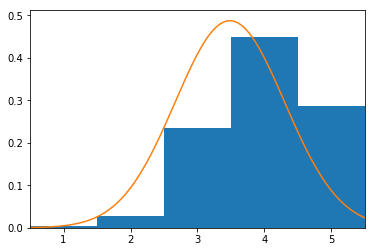

NormaltestResult(statistic=8.420064570889839, pvalue=0.014845889024217076)

(0.846969485282898, 4.538377967433071e-15)

In [1416]:
bins=range(1, 7)
first_half=df[df['Week']<10]
first_half['Overall Satisfaction'].hist(bins=bins, density=True)
bins_labels(bins)
min_bal=first_half['Overall Satisfaction'].min()
max_bal=first_half['Overall Satisfaction'].max()
norm_x=np.linspace(min_bal, max_bal+1, len(first_half))
plt.plot(norm_x, 
         sts.norm.pdf(norm_x, 
                      loc=first_half['Overall Satisfaction'].mean(), 
                      scale=first_half['Overall Satisfaction'].std()))
plt.grid(False)
plt.show()
display(sts.normaltest(first_half['Overall Satisfaction']))
display(sts.shapiro(first_half['Overall Satisfaction']))

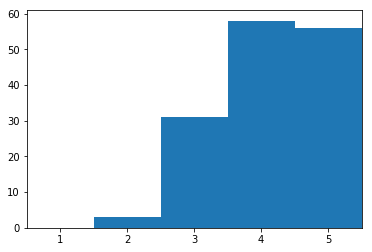

In [1396]:
bins=range(1, 7)
df[df['Week']>=10]['Overall Satisfaction'].hist(bins=bins)
bins_labels(bins)
plt.grid(False)
plt.show()

In [801]:
good_random_student=random_student

In [1753]:
# random_student=np.random.choice(df['Student Name'].unique(), size=2, replace=False)
random_student=['Test 1', 'Test 2']

In [1190]:
sample_df=df[df['Student Name'].isin(random_student)]
overall_df=sample_df[['Week', 'Student Name', 'Overall Satisfaction']]#.pivot(index='Student Name', columns='Week', values='Overall Satisfaction')
from sklearn.metrics import cohen_kappa_score
sample=overall_df.pivot(index='Week', columns='Student Name', values='Overall Satisfaction')
print(cohen_kappa_score(sample['Test 1'], sample['Test 1']))
# print(cohen_kappa_score(sample['Test 1'].sample(frac=1, replace=False), sample['Test 2'].sample(frac=1, replace=False)))
sts.linregress(sample['Test 1'], sample['Test 2'])

1.0


LinregressResult(slope=1.0, intercept=-1.0, rvalue=1.0, pvalue=1.0642700233707224e-109, stderr=0.0)

In [1771]:
sample[['Test 1', 'Test 2']].corr()

Student Name,Test 1,Test 2
Student Name,,
Test 1,1.0,1.0
Test 2,1.0,1.0


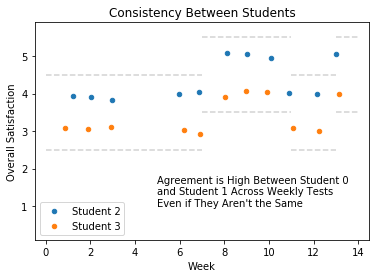

In [1762]:
cmap=plt.get_cmap('tab10')
sample_df=df[df['Student Name'].isin(random_student)]
sample_df_c={each_name: idx for idx, each_name in enumerate(random_student)}
overall_df=sample_df[['Week', 'Student Name', 'Overall Satisfaction']]#.pivot(index='Student Name', columns='Week', values='Overall Satisfaction')
for each_student in random_student: 
    student_df=overall_df[overall_df['Student Name']==each_student]
    plt.scatter(x=rand_jitter(student_df['Week'], 0.01), 
                y=rand_jitter(student_df['Overall Satisfaction'], 0.08), 
    #             c=overall_df['Student Name'].map(sample_df_c), 
                color=cmap(sample_df_c[each_student]), 
                s=20, 
                label=f'Student {sample_df_c[each_student]+2}')
    #             color=overall_df['Student Name'])
plt.ylim([0.1, 5.9])
plt.xlim([-.5, 14.5])
plt.hlines([2.5, 4.5], 0, 7, colors='lightgrey', linestyle='--')
plt.hlines([2.5, 4.5], 11, 13, colors='lightgrey', linestyle='--')
plt.hlines([3.5, 5.5], 7, 11, colors='lightgrey', linestyle='--')
plt.hlines([3.5, 5.5], 13, 14, colors='lightgrey', linestyle='--')
plt.xlabel('Week')
plt.title('Consistency Between Students')
plt.ylabel('Overall Satisfaction')
plt.annotate("Agreement is High Between Student 0\nand Student 1 Across Weekly Tests\nEven if They Aren't the Same", (5, 1))
plt.legend(loc='lower left')

In [1606]:
random_student_2=['24', '1']

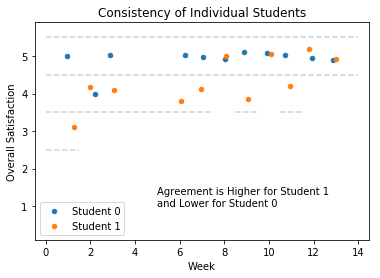

In [1808]:
cmap=plt.get_cmap('tab10')
sample_df=df[df['Student Name'].isin(random_student_2)]
sample_df_c={each_name: idx for idx, each_name in enumerate(random_student_2)}
overall_df=sample_df[['Week', 'Student Name', 'Overall Satisfaction']]#.pivot(index='Student Name', columns='Week', values='Overall Satisfaction')
for each_student in random_student_2: 
    student_df=overall_df[overall_df['Student Name']==each_student]
    plt.scatter(x=rand_jitter(student_df['Week'], 0.01), 
                y=rand_jitter(student_df['Overall Satisfaction'], 0.08), 
    #             c=overall_df['Student Name'].map(sample_df_c), 
                color=cmap(sample_df_c[each_student]), 
                s=20, 
                label=f'Student {sample_df_c[each_student]}')
    #             color=overall_df['Student Name'])
plt.ylim([0.1, 5.9])
plt.xlim([-.5, 14.5])
plt.hlines([4.5, 5.5], 0, 14, colors='lightgrey', linestyle='--')
plt.hlines([3.5], 0, 7.5, colors='lightgrey', linestyle='--')
plt.hlines([3.5], 8.5, 9.5, colors='lightgrey', linestyle='--')
plt.hlines([2.5], 0, 1.5, colors='lightgrey', linestyle='--')
plt.hlines([3.5], 10.5, 11.5, colors='lightgrey', linestyle='--')
plt.xlabel('Week')
plt.title('Consistency of Individual Students')
plt.ylabel('Overall Satisfaction')
plt.annotate('Agreement is Higher for Student 1\nand Lower for Student 0', (5, 1))
plt.legend(loc='lower left')

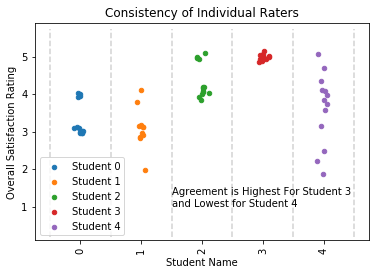

In [1164]:
cmap=plt.get_cmap('tab10')
sample_df=df[df['Student Name'].isin(random_student_2)]
sample_df_c={each_name: idx for idx, each_name in enumerate(random_student_2)}
overall_df=sample_df[['Student Name', 'Overall Satisfaction']]#.pivot(index='Student Name', columns='Week', values='Overall Satisfaction')
for each_student in random_student_2: 
    student_df=overall_df[overall_df['Student Name']==each_student]
    plt.scatter(x=rand_jitter(student_df['Student Name'].map(sample_df_c), 0.05), 
                y=rand_jitter(student_df['Overall Satisfaction'], 0.1), 
    #             c=overall_df['Student Name'].map(sample_df_c), 
                color=cmap(sample_df_c[each_student]), 
                s=20, 
                label=f'Student {sample_df_c[each_student]}')
    #             color=overall_df['Student Name'])
plt.ylim([.1, 5.9])
plt.xlim([-.75, 4.75])
plt.xticks(rotation=90)
plt.vlines([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5], 0.2, 5.75, colors='lightgrey', linestyle='--')
# plt.hlines([4.5, 5.5], 0, 14, colors='lightgrey', linestyle='--')
plt.xlabel('Student Name')
plt.ylabel('Overall Satisfaction Rating')
plt.title('Consistency of Individual Raters')
plt.annotate('Agreement is Highest For Student 3\nand Lowest for Student 4', (1.5, 1))
plt.legend()

LinregressResult(slope=0.01502616785189217, intercept=3.9232544239231073, rvalue=0.0678843947627525, pvalue=0.14255878305392564, stderr=0.010230157893464147)

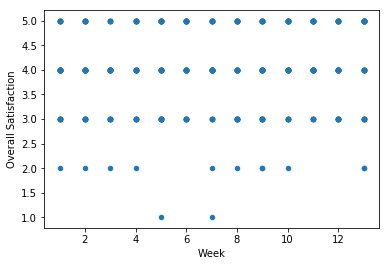

In [1069]:
df[['Week', 'Overall Satisfaction']].plot(kind='scatter', x='Week', y='Overall Satisfaction')
sts.linregress(df['Week'], df['Overall Satisfaction'])

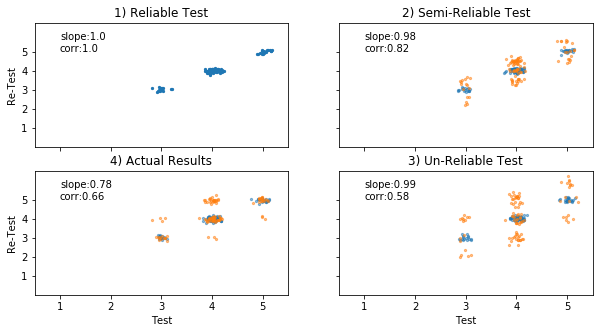

In [1421]:
first_half=df[df['Week']<10][['Student Name', 'Overall Satisfaction']].groupby('Student Name').mean().round()
second_half=df[df['Week']>=10][['Student Name', 'Overall Satisfaction']].groupby('Student Name').mean().round()
combined_df=pd.concat([first_half, second_half], axis=1)
combined_df=combined_df.sample(100, replace=True)
# values=df[df['Week']>=10]['Overall Satisfaction'].values
# rand_list_a=combined_df.iloc[:, 0].values.reshape(-1)
# rand_list_a=np.random.choice(rand_list_a, size=500)
# rand_list_a=np.random.choice(values, size=500)
# rand_list_a=np.random.randint(1, 6, size=500)
# rand_list_b=rand_list_a+1
# rand_list_b=rand_list_a
diff_list_small=[-.5, 0, .5]
diff_list_large=[-1, 0, 1]

# rand_list_c=[n+np.random.choice(diff_list_small) for n in rand_list_a]
# rand_list_d=[n+np.random.choice(diff_list_large) for n in rand_list_a]
# rand_list_e=[max(min(n+np.random.choice(diff_list_large), 5), 0) for n in rand_list_b]
# rand_list_e=combined_df.iloc[:, 1].values.reshape(-1)
# rand_list_e=np.random.choice(rand_list_e, size=500)

fig, ax=plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)

def plot_corr(a_list, b_list, plot_ax, c_1, c_2, a_1=1, a_2=1):  
    plot_ax.scatter(rand_jitter(a_list, .04), rand_jitter(a_list, 0.04), s=5, c=c_1, alpha=a_1)
    if not np.array_equal(a_list, b_list): 
        plot_ax.scatter(rand_jitter(a_list, .04), rand_jitter(b_list, 0.04), s=5, c=c_2, alpha=a_2)
    m, b, r, p, std=sts.linregress(a_list, b_list)
    plot_ax.annotate(f'slope:{round(m, 2)}\ncorr:{round(r, 2)}', (1, 5))

plot_corr(rand_list_a, rand_list_a, ax[0][0], 'tab:blue', 'tab:green', 1, .2)
ax[0][0].set_title('1) Reliable Test')
plot_corr(rand_list_a, rand_list_c, ax[0][1], 'tab:blue', 'tab:orange', .5, .5)
ax[0][1].set_title('2) Semi-Reliable Test')
plot_corr(rand_list_a, rand_list_d, ax[1][1], 'tab:blue', 'tab:orange', .5, .5)
ax[1][1].set_title('3) Un-Reliable Test')
plot_corr(rand_list_a, rand_list_e, ax[1][0], 'tab:blue', 'tab:orange', .5, .5)
ax[1][0].set_title('4) Actual Results')
plt.xlim([0.5, 5.5])
plt.ylim([0, 6.5])
plt.yticks([1, 2, 3, 4, 5])
ax[1][0].set_xlabel('Test')
ax[1][1].set_xlabel('Test')
ax[0][0].set_ylabel('Re-Test')
ax[1][0].set_ylabel('Re-Test')

plt.show()


#### Inter-Rater Reliability

In [1497]:
# combined_df.head()
combined_df.pivot(columns='Student Name', index='multi_index', values='value')

Student Name,1,10,11,12,13,14,15,17,18,19,...,36,37,38,39,4,5,6,7,8,9
multi_index,,,,,,,,,,,,,,,,,,,,,
10Overall Satisfaction,5.0,5.0,3.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,...,5.0,4.0,4.0,5.0,4.0,5.0,3.0,3.0,5.0,4.0
11Overall Satisfaction,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,...,5.0,4.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
12Overall Satisfaction,5.0,5.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,3.0,...,5.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0
13Overall Satisfaction,5.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,...,5.0,3.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0
1Overall Satisfaction,3.0,4.0,3.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,...,5.0,5.0,4.0,3.0,4.0,5.0,5.0,3.0,5.0,3.0
2Overall Satisfaction,4.0,5.0,3.0,5.0,4.0,3.0,4.0,5.0,4.0,4.0,...,5.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0
3Overall Satisfaction,4.0,NaN,2.0,5.0,3.0,4.0,4.0,4.0,NaN,NaN,...,NaN,4.0,4.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0
6Overall Satisfaction,4.0,5.0,3.0,5.0,5.0,4.0,4.0,5.0,4.0,4.0,...,5.0,3.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0
7Overall Satisfaction,4.0,4.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,...,5.0,4.0,5.0,5.0,5.0,4.0,3.0,3.0,4.0,4.0


In [1562]:
combined_df.pivot(columns='Student Name', index='multi_index', values='value')

Student Name,1,10,11,12,13,14,15,17,18,19,...,36,37,38,39,4,5,6,7,8,9
multi_index,,,,,,,,,,,,,,,,,,,,,
1 Instructor Knowledge,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,...,5.0,5.0,3.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0
10 Instructor Knowledge,5.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,...,5.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0
11 Instructor Knowledge,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,...,5.0,4.0,3.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
12 Instructor Knowledge,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,4.0,...,5.0,4.0,4.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0
13 Instructor Knowledge,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,...,5.0,3.0,4.0,5.0,4.0,5.0,5.0,3.0,5.0,4.0
2 Instructor Knowledge,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,5.0
3 Instructor Knowledge,4.0,NaN,4.0,4.0,5.0,4.0,5.0,4.0,NaN,NaN,...,NaN,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0
6 Instructor Knowledge,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,5.0,4.0,5.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0
7 Instructor Knowledge,4.0,5.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,4.0,...,5.0,4.0,5.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0


In [1587]:
combined_df.pivot(columns='Student Name', index='Week-Metric', values='value')

Student Name,1,10,11,12,13,14,15,17,18,19,...,36,37,38,39,4,5,6,7,8,9
Week-Metric,,,,,,,,,,,,,,,,,,,,,
1 Academic Support,4.0,5.0,3.0,5.0,5.0,3.0,4.0,5.0,4.0,3.0,...,5.0,5.0,4.0,3.0,3.0,5.0,5.0,4.0,5.0,2.0
1 Apply Learning Outside Class,4.0,5.0,3.0,5.0,3.0,3.0,3.0,5.0,3.0,4.0,...,5.0,4.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,1.0
1 Class Pace,3.0,2.0,3.0,5.0,3.0,4.0,4.0,4.0,4.0,3.0,...,3.0,5.0,2.0,3.0,2.0,3.0,3.0,1.0,3.0,4.0
1 Instructor Clarity,3.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,...,5.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0
1 Instructor Engagement,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,...,5.0,5.0,2.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9 Class Pace,4.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,...,3.0,3.0,4.0,5.0,4.0,4.0,3.0,2.0,4.0,4.0
9 Instructor Clarity,4.0,5.0,5.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,...,5.0,5.0,4.0,5.0,5.0,5.0,2.0,4.0,4.0,4.0
9 Instructor Engagement,4.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,...,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0


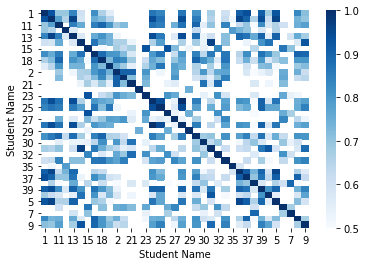

In [1556]:
sns.heatmap(corr_df[corr_df>.5], cmap='Blues')

In [1592]:
corr_df.style.background_gradient()

Student Name,1,10,11,12,13,14,15,17,18,19,...,36,37,38,39,4,5,6,7,8,9
Overall Satisfaction,4.272727,4.8,3.181818,4.727273,4.454545,3.818182,4.272727,4.272727,4.1,3.8,...,4.9,4.090909,4.000000,4.727273,4.636364,4.454545,3.545455,3.272727,4.454545,3.545455
Class Pace,3.272727,4.0,4.090909,3.909091,3.727273,4.272727,4.000000,3.909091,4.3,4.2,...,3.2,3.363636,3.181818,4.090909,3.818182,3.636364,4.000000,2.363636,3.727273,4.090909
Academic Support,4.272727,5.0,3.545455,4.818182,4.000000,3.727273,4.272727,4.363636,4.5,3.3,...,4.9,4.272727,4.000000,4.545455,4.181818,4.545455,4.818182,3.909091,4.090909,3.454545
Apply Learning Outside Class,4.363636,4.9,3.454545,4.545455,4.090909,3.181818,4.000000,3.636364,3.0,3.3,...,5.0,3.636364,3.636364,4.000000,3.454545,4.363636,3.090909,4.272727,3.363636,2.272727
Instructor Engagement,4.454545,5.0,4.181818,4.272727,4.727273,4.090909,3.909091,4.363636,4.2,3.9,...,5.0,4.363636,3.636364,4.454545,4.818182,4.363636,4.818182,3.909091,4.000000,3.636364
Instructor Clarity,4.363636,4.9,4.000000,4.181818,4.727273,4.090909,4.090909,4.272727,3.9,3.9,...,5.0,4.272727,3.909091,4.454545,4.909091,4.454545,3.272727,3.818182,4.181818,3.363636
Instructor Knowledge,4.454545,5.0,4.181818,4.545455,5.000000,4.181818,4.909091,4.545455,4.7,4.3,...,5.0,4.454545,4.000000,4.636364,4.636364,4.636364,4.545455,3.363636,4.545455,4.181818
Homework Feedback Rating,4.090909,4.5,2.000000,4.727273,3.636364,3.090909,0.636364,3.818182,2.8,3.0,...,3.9,3.636364,2.272727,4.090909,4.545455,3.818182,1.545455,1.000000,3.545455,3.909091
Outside Time Spent,1.454545,1.9,1.909091,3.818182,1.272727,3.000000,2.909091,2.000000,1.8,1.9,...,2.2,1.727273,3.090909,2.181818,2.909091,1.363636,1.727273,2.181818,2.454545,1.272727


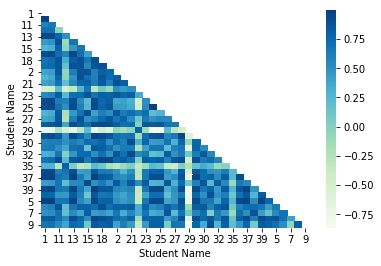

In [1596]:
display(df.groupby('Student Name').mean().drop(columns=['Week']).transpose())
corr_df=df.groupby('Student Name').mean().drop(columns=['Week']).transpose().corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, cmap='GnBu', mask=mask)
# plt.yticks([])
# plt.xticks([])
plt.show()

In [1555]:
corr_df.head()

Student Name,1,10,11,12,13,14,15,17,18,19,...,36,37,38,39,4,5,6,7,8,9
Student Name,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.934720,0.693375,0.693375,0.838628,0.602764,-0.064923,0.818183,0.660867,0.556749,...,0.909870,0.942990,0.485363,0.911922,0.680545,0.928191,0.104530,0.186052,0.832050,0.713200
10,0.934720,1.000000,0.780895,0.657596,0.963123,0.590301,0.105828,0.756235,0.720780,0.641167,...,0.957453,0.904194,0.657596,0.945946,0.616953,0.962822,0.247841,0.441129,0.739795,0.698454
11,0.693375,0.780895,1.000000,0.250000,0.850420,0.755929,0.380384,0.850000,0.895929,0.802955,...,0.626628,0.700000,0.500000,0.821995,0.577350,0.657376,0.603023,0.447214,0.750000,0.782624
12,0.693375,0.657596,0.250000,1.000000,0.566947,0.188982,-0.058521,0.400000,0.381246,0.114708,...,0.737210,0.700000,0.500000,0.575396,0.288675,0.657376,0.150756,0.223607,0.500000,0.447214
13,0.838628,0.963123,0.850420,0.566947,1.000000,0.571429,0.353899,0.755929,0.806947,0.737043,...,0.891645,0.869318,0.755929,0.900986,0.545545,0.903508,0.455842,0.591608,0.755929,0.676123


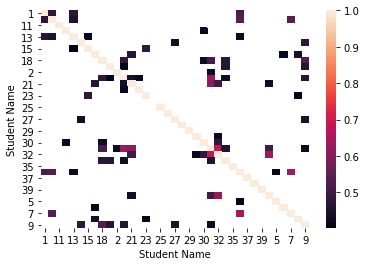

In [1586]:
# limited_feature_columns=['Instructor Knowledge']
limited_feature_columns=['Overall Satisfaction', 'Class Pace', 
                 'Academic Support', 'Apply Learning Outside Class', 
                 'Instructor Engagement', 
                 'Instructor Knowledge', 'Instructor Clarity']#, 'Homework Feedback Rating']
df_list=[]
for each_metric in limited_feature_columns: 
    metric_df=df.loc[:, ['Week', 'Student Name', each_metric]]
    metric_df.loc[:, 'metric']=each_metric
    metric_df=metric_df.rename(columns={each_metric: 'value'})
    df_list.append(metric_df)
combined_df=pd.concat(df_list, axis=0)
combined_df.loc[:, 'Week-Metric']=combined_df.loc[:, 'Week'].astype(str)+' '+combined_df.loc[:, 'metric']
corr_df=combined_df.pivot(columns='Student Name', index='Week-Metric', values='value').corr()
corr_data={}
sns.heatmap(corr_df[corr_df>0.4])

In [1578]:
student_list=df['Student Name'].unique()
metrics={}
for each_metric in feature_columns: 
    metric_df=df[['Week', 'Student Name', each_metric]]
    corr_df=metric_df.pivot(columns='Student Name', index='Week').stack(level=0).corr()
    corr_data={}
    for i in range(len(student_list)-1): 
        name_range=f'student {student_list[i]}-{student_list[i+1]}'
        corr_data[name_range]=round(corr_df.iloc[i, i+1], 2)
    metrics[each_metric]=corr_data
# display(pd.DataFrame(metrics).mean())#.style.background_gradient()
# display(pd.DataFrame(metrics).median())
display(pd.DataFrame(metrics))

,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating
student 1-2,0.62,0.22,NaN,0.27,NaN,0.20,NaN,-0.33
student 2-3,-0.22,0.36,NaN,0.27,NaN,0.00,NaN,0.00
student 3-4,-0.16,-0.20,-0.43,-0.50,0.06,0.13,-0.28,-0.46
student 4-5,-0.20,0.10,-0.37,-0.39,-0.04,0.12,NaN,0.09
student 5-6,-0.02,-0.04,0.00,0.12,0.19,0.11,NaN,0.50
student 6-7,0.55,-0.35,-0.08,0.00,0.10,0.56,-0.45,0.27
student 7-8,0.06,0.64,-0.03,-0.13,0.18,-0.12,-0.22,0.07
student 8-9,-0.09,-0.35,0.45,0.20,0.55,-0.11,-0.07,0.33
student 9-10,-0.37,0.51,-0.16,0.22,0.67,0.76,-0.52,0.42
student 10-11,0.25,-0.25,-0.15,0.22,0.00,0.09,0.10,0.28


In [1488]:
student_list=df['Student Name'].unique()
metrics={}
for each_metric in feature_columns: 
    metric_df=df[['Week', 'Student Name', each_metric]]
    corr_df=metric_df.pivot(columns='Student Name', index='Week').stack(level=0).corr()
    corr_data={}
    for i in range(len(student_list)-1): 
        name_range=f'student {student_list[i]}-{student_list[i+1]}'
        corr_data[name_range]=round(corr_df.iloc[i, i+1], 2)
    metrics[each_metric]=corr_data
display(pd.DataFrame(metrics))

,Overall Satisfaction,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating
student 1-2,0.62,0.22,NaN,0.27,NaN,0.20,NaN,-0.33
student 2-3,-0.22,0.36,NaN,0.27,NaN,0.00,NaN,0.00
student 3-4,-0.16,-0.20,-0.43,-0.50,0.06,0.13,-0.28,-0.46
student 4-5,-0.20,0.10,-0.37,-0.39,-0.04,0.12,NaN,0.09
student 5-6,-0.02,-0.04,0.00,0.12,0.19,0.11,NaN,0.50
student 6-7,0.55,-0.35,-0.08,0.00,0.10,0.56,-0.45,0.27
student 7-8,0.06,0.64,-0.03,-0.13,0.18,-0.12,-0.22,0.07
student 8-9,-0.09,-0.35,0.45,0.20,0.55,-0.11,-0.07,0.33
student 9-10,-0.37,0.51,-0.16,0.22,0.67,0.76,-0.52,0.42
student 10-11,0.25,-0.25,-0.15,0.22,0.00,0.09,0.10,0.28


In [1379]:
corr_df=metric_df.pivot(columns='Week', index='Student Name', values=each_metric).corr()#.stack(level=0)
display(corr_df)
corr_df.iloc[1, 2]

Week,1,2,3,4,5,7,8,9,10,11,12,13
Week,,,,,,,,,,,,
1,1.000000,0.413376,0.469014,0.155970,0.156924,0.031069,0.195763,0.196239,0.295838,0.445220,0.272228,0.281284
2,0.413376,1.000000,0.281086,0.154830,0.007163,0.050690,0.367604,0.343545,0.265364,0.451697,0.306739,0.453066
3,0.469014,0.281086,1.000000,0.192822,0.205714,0.615868,0.445657,0.574775,0.398914,0.568442,0.065457,0.526183
4,0.155970,0.154830,0.192822,1.000000,0.331280,0.161854,0.050351,0.173116,0.404229,0.332583,0.700346,0.354575
5,0.156924,0.007163,0.205714,0.331280,1.000000,0.136441,0.033986,0.006065,0.217374,0.278184,0.548179,0.252224
7,0.031069,0.050690,0.615868,0.161854,0.136441,1.000000,0.449353,0.533129,0.514389,0.420569,0.068594,0.362420
8,0.195763,0.367604,0.445657,0.050351,0.033986,0.449353,1.000000,0.625925,0.417157,0.542204,0.153123,0.566644
9,0.196239,0.343545,0.574775,0.173116,0.006065,0.533129,0.625925,1.000000,0.402506,0.473210,0.230735,0.552661
10,0.295838,0.265364,0.398914,0.404229,0.217374,0.514389,0.417157,0.402506,1.000000,0.497164,0.494399,0.278000


0.28108626027963923

#### Test-Retest Reliability (Intra-Rater Reliabiilty)

In [1579]:
# limited_feature_columns=['Overall Satisfaction']
limited_feature_columns=['Overall Satisfaction', 'Class Pace', 
                 'Academic Support', 'Apply Learning Outside Class', 
                 'Instructor Engagement', 
                 'Instructor Knowledge', 'Instructor Clarity']#, 'Homework Feedback Rating']
df_list=[]
for each_metric in limited_feature_columns: 
    metric_df=df.loc[:, ['Week', 'Student Name', each_metric]]
    metric_df.loc[:, 'metric']=each_metric
    metric_df=metric_df.rename(columns={each_metric: 'value'})
    df_list.append(metric_df)
combined_df=pd.concat(df_list, axis=0)
combined_df.loc[:, 'Student Name-Metric']=combined_df.loc[:, 'Student Name']+combined_df.loc[:, 'metric']
corr_df=combined_df.pivot(columns='Week', index='Student Name-Metric', values='value').corr()
corr_data={}
corr_df

Week,1,2,3,6,7,8,9,10,11,12,13
Week,,,,,,,,,,,
1,1.000000,0.486757,0.297343,0.384893,0.392160,0.362993,0.325986,0.442491,0.402396,0.300460,0.365784
2,0.486757,1.000000,0.537260,0.575975,0.566507,0.498494,0.490776,0.441832,0.463984,0.514504,0.456712
3,0.297343,0.537260,1.000000,0.435461,0.438380,0.337060,0.496563,0.444556,0.309623,0.354859,0.331206
6,0.384893,0.575975,0.435461,1.000000,0.583336,0.531901,0.435014,0.496225,0.459360,0.481930,0.428025
7,0.392160,0.566507,0.438380,0.583336,1.000000,0.520901,0.573164,0.495781,0.518489,0.414694,0.482771
8,0.362993,0.498494,0.337060,0.531901,0.520901,1.000000,0.543906,0.559394,0.541804,0.630642,0.554626
9,0.325986,0.490776,0.496563,0.435014,0.573164,0.543906,1.000000,0.591924,0.643565,0.541294,0.629563
10,0.442491,0.441832,0.444556,0.496225,0.495781,0.559394,0.591924,1.000000,0.627540,0.556493,0.574689
11,0.402396,0.463984,0.309623,0.459360,0.518489,0.541804,0.643565,0.627540,1.000000,0.555072,0.684806


In [1419]:
# df[df['Week'].isin([1, 2])].pivot(columns='Week', index='Student Name').stack(level=0).corr()
pivot_df=df[['Week', 'Student Name', 'Overall Satisfaction']].pivot(columns='Week', index='Student Name', values='Overall Satisfaction')
display(pivot_df.iloc[:10, :2].rename(columns={1: 'Prior Week', 2: 'Following Week'}))
week_list=df['Week'].unique()
metrics={}
for each_metric in feature_columns: 
    metric_df=df[['Week', 'Student Name', each_metric]]
    pivot_df=metric_df.pivot(columns='Week', index='Student Name', values=each_metric)
    corr_df=pivot_df.corr()
    corr_data={}
    for i in range(len(week_list)-1): 
        date_range=f'week {week_list[i]} - week {week_list[i+1]}'
        corr_data[date_range]=round(corr_df.iloc[i, i+1], 2)
    metrics[each_metric]=corr_data
# display(pd.DataFrame(metrics).mean())#.style.background_gradient()
# display(pd.DataFrame(metrics).median())
result_df=pd.DataFrame(metrics)
result_df[['Overall Satisfaction']].rename(columns={'Overall Satisfaction': 'Test-Retest Reliability'})

Week,Prior Week,Following Week
Student Name,,
1,3.0,4.0
10,4.0,5.0
11,3.0,3.0
12,5.0,5.0
13,4.0,4.0
14,3.0,3.0
15,4.0,4.0
17,4.0,5.0
18,4.0,4.0


,Test-Retest Reliability
week 1 - week 2,0.45
week 2 - week 3,0.63
week 3 - week 6,0.37
week 6 - week 7,0.51
week 7 - week 8,0.51
week 8 - week 9,0.44
week 9 - week 10,0.47
week 10 - week 11,0.61
week 11 - week 12,0.50
week 12 - week 13,0.65


#### Internal Consistency

,Overall Satisfaction,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge
Student Name,,,,,,
1,4.272727,4.272727,4.363636,4.454545,4.363636,4.454545
10,4.800000,5.000000,4.900000,5.000000,4.900000,5.000000
11,3.181818,3.545455,3.454545,4.181818,4.000000,4.181818
12,4.727273,4.818182,4.545455,4.272727,4.181818,4.545455
13,4.454545,4.000000,4.090909,4.727273,4.727273,5.000000


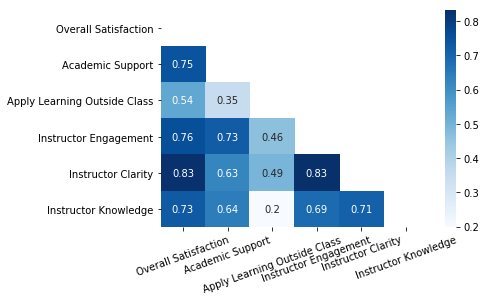

In [1542]:
import seaborn as sns
internal_consistency_columns=['Overall Satisfaction', 'Academic Support', 'Apply Learning Outside Class', 
                              'Instructor Engagement', 'Instructor Clarity', 'Instructor Knowledge']
display(df[['Student Name', 'Week']+internal_consistency_columns].groupby('Student Name').mean().drop(columns=['Week']).head())
corr_df=df[['Student Name', 'Week']+internal_consistency_columns].groupby('Student Name').mean().drop(columns=['Week']).corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
sns.heatmap(corr_df, annot=True, cmap='Blues', mask=mask)#.iloc[0, :])
plt.xticks(rotation=20)
plt.show()

,Overall Satisfaction,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge
Student Name-Week,,,,,,
1-1,3,4,4,4,3,3
2-1,4,4,4,4,5,5
3-1,4,5,4,5,5,4
4-1,4,3,5,4,5,4
5-1,5,5,5,5,5,5
...,...,...,...,...,...,...
4-13,5,4,3,4,4,4
36-13,5,5,5,5,5,5
29-13,3,3,3,3,3,3


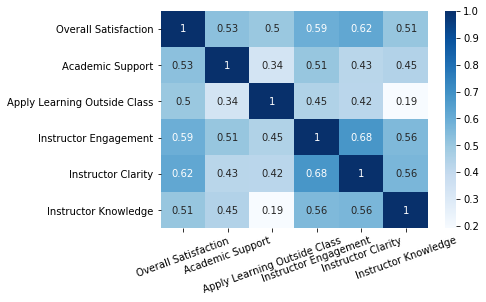

In [1583]:
import seaborn as sns
internal_consistency_columns=['Overall Satisfaction', 'Academic Support', 'Apply Learning Outside Class', 
                              'Instructor Engagement', 'Instructor Clarity', 'Instructor Knowledge']
df['Student Name-Week']=df['Student Name']+'-'+df['Week'].astype(str)
display(df[['Student Name-Week']+internal_consistency_columns].set_index('Student Name-Week'))
sns.heatmap(df[internal_consistency_columns].corr(), annot=True, cmap='Blues')#.iloc[0, :])
plt.xticks(rotation=20)
plt.show()

In [1473]:
def cronbach_alpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

In [1469]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [1457]:
# Source: https://towardsdatascience.com/cronbachs-alpha-theory-and-application-in-python-d2915dd63586
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [1474]:
display(cronbach_alpha(df[internal_consistency_columns]))
display(CronbachAlpha(df[internal_consistency_columns].values))

0.8394868044482432

0.9889419183758086

#### Concurrent Validity

[(1626998409861.6516, '1'),
 (0.9063846231722485, 'x0'),
 (-0.09396798676603002, 'x1'),
 (-1.0706783065710372, 'x2'),
 (-0.989560807092577, 'x3'),
 (1.573868055321905, 'x4'),
 (1.788015122493645, 'x5'),
 (-0.37188966015295283, 'x6'),
 (-0.05408016594520856, 'x0^2'),
 (0.07688711419593877, 'x0 x1'),
 (0.06331010607976637, 'x0 x2'),
 (0.11109584042625648, 'x0 x3'),
 (-0.23695907957437778, 'x0 x4'),
 (-0.1584123678297142, 'x0 x5'),
 (0.0389125203239715, 'x0 x6'),
 (0.25181655290904065, 'x1^2'),
 (0.2138758468045162, 'x1 x2'),
 (-0.18217136707687848, 'x1 x3'),
 (-0.02010356575686337, 'x1 x4'),
 (-0.4247485547150214, 'x1 x5'),
 (0.023552513594269804, 'x1 x6'),
 (-0.057388596964939684, 'x2^2'),
 (-0.10875057077637498, 'x2 x3'),
 (0.011074273248376546, 'x2 x4'),
 (0.18819341880193052, 'x2 x5'),
 (-0.00396748632623298, 'x2 x6'),
 (0.02939073247576286, 'x3^2'),
 (0.1271831417074729, 'x3 x4'),
 (0.1736480226982532, 'x3 x5'),
 (0.11831754110122066, 'x3 x6'),
 (-0.06305148835170477, 'x4^2'),
 (-0.

0.40797337092006536


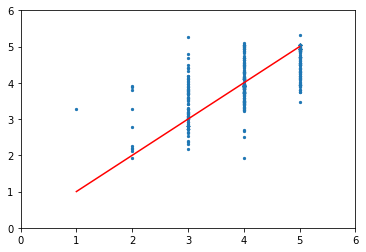

In [1690]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(2)
lr=LinearRegression()
X=df[feature_columns].drop(columns=['Overall Satisfaction'])
X_transformed=poly.fit_transform(X)
y=df['Overall Satisfaction']
lr.fit(X_transformed, y)
display(list(zip(lr.coef_, poly.get_feature_names())))
print(lr.score(X_transformed, y))
predicted=lr.predict(X_transformed)
plt.scatter(rand_jitter(y, 0.00), rand_jitter(predicted, 0.00), s=5)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)], c='r')
plt.show()

In [1693]:
X

,Class Pace,Academic Support,Apply Learning Outside Class,Instructor Engagement,Instructor Clarity,Instructor Knowledge,Homework Feedback Rating
0,3,4,4,4,3,3,3
1,4,4,4,4,5,5,0
2,4,5,4,5,5,4,0
3,2,3,5,4,5,4,3
4,3,5,5,5,5,5,4
...,...,...,...,...,...,...,...
480,4,4,3,4,4,4,5
481,3,5,5,5,5,5,5
482,3,4,1,3,1,3,4
483,4,4,4,4,4,4,4


[(-0.012705606304805588, 'Class Pace'),
 (0.20853626759162447, 'Academic Support'),
 (0.15980988967791765, 'Apply Learning Outside Class'),
 (0.07869054389127536, 'Instructor Engagement'),
 (0.24017478885369983, 'Instructor Clarity'),
 (0.19041085690155066, 'Instructor Knowledge'),
 (0.07807268553717599, 'Homework Feedback Rating')]

0.5672748916604793


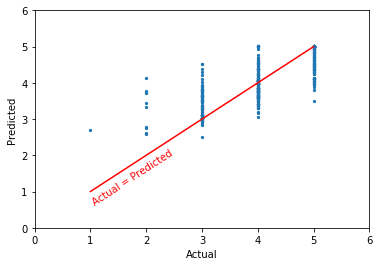

In [1707]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X=df[feature_columns].drop(columns=['Overall Satisfaction'])
y=df['Overall Satisfaction']
lr.fit(X, y)
display(list(zip(lr.coef_, X.columns)))
print(lr.score(X, y))
predicted=lr.predict(X)
plt.scatter(rand_jitter(y, 0.00), rand_jitter(predicted, 0.00), s=5)
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.plot([np.min(y), np.max(y)], [np.min(y), np.max(y)], c='r')
plt.annotate('Actual = Predicted', (1, 2), rotation=33, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Week       First    Second
Week                      
First   1.000000  0.504561
Second  0.504561  1.000000


LinregressResult(slope=0.5208188066540501, intercept=1.94130391473254, rvalue=0.5045608796094462, pvalue=2.165345696075504e-24, stderr=0.04736652046464841)

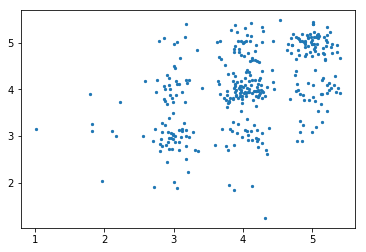

In [1420]:
df_list=[]
metric_df=df[['Week', 'Student Name', 'Overall Satisfaction']]
pivot_df=metric_df.pivot(columns='Week', index='Student Name').stack(level=0)
for i in range(len(week_list)-1): 
    two_weeks_df=pivot_df.iloc[:, [i, i+1]]
    columns_mapper={two_weeks_df.columns[0]: 'First', 
                    two_weeks_df.columns[1]: 'Second'}
    two_weeks_df=two_weeks_df.rename(columns=columns_mapper)
    df_list.append(two_weeks_df)
combined_df=pd.concat(df_list, axis=0).dropna()
plt.scatter(x=rand_jitter(combined_df['First'], .05), y=rand_jitter(combined_df['Second'], .05), s=5)
print(combined_df.corr())
sts.linregress(combined_df['First'], combined_df['Second'])

Week       First    Second
Week                      
First   1.000000  0.613781
Second  0.613781  1.000000


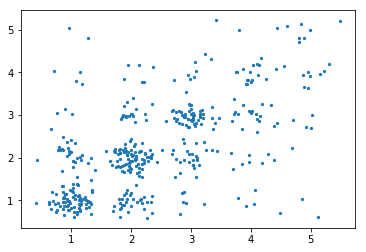

In [126]:
df_list=[]
pivot_df=metric_df.pivot(columns='Week', index='Student Name').stack(level=0)
for i in range(len(week_list)-1): 
    two_weeks_df=pivot_df.iloc[:, [i, i+1]]
    columns_mapper={two_weeks_df.columns[0]: 'First', 
                    two_weeks_df.columns[1]: 'Second'}
    two_weeks_df=two_weeks_df.rename(columns=columns_mapper)
    df_list.append(two_weeks_df)
combined_df=pd.concat(df_list, axis=0)
plt.scatter(x=rand_jitter(combined_df['First'], .05), y=rand_jitter(combined_df['Second'], .05), s=5)
print(combined_df.corr())

In [113]:
df_list=[]
pivot_df=metric_df.pivot(columns='Week', index='Student Name').stack(level=0)
for i in range(len(week_list)-1): 
    two_weeks_df=pivot_df.iloc[:, [i, i+1]]
    columns_mapper={two_weeks_df.columns[0]: 'First', 
                    two_weeks_df.columns[1]: 'Second'}
    two_weeks_df=two_weeks_df.rename(columns=columns_mapper)
    df_list.append(two_weeks_df)
combined_df=pd.concat(df_list, axis=0)
plt.scatter(x=rand_jitter(combined_df['First']), y=rand_jitter(combined_df['Second']), s=5)
print(combined_df.corr())

NameError: name 'metric_df' is not defined

In [1738]:
scale_len=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 101]
reliability=[.88, .86, .89, .91, .92, .93, .94, .94, .93, .92, .90]
cronbachs=[.81, .79, .82, .82, .83, .85, .85, .85, .85, .86, .85]
criterion=[.83, .82, .85, .87, .88, .87, .87, .89, .87, .88, .89]
intertertile=[.87, .90, .92, .95, .96, .97, .97, .96, .96, .96, .96]
discrim=[19.2, 16.8, 18.6, 20.8, 21.5, 20.8, 22.2, 23.7, 22.3, 23, 23.4]
discrim_25=[n/25 for n in discrim]
ease_of_use=[78.6, 81.4, 82, 83.7, 81.3, 82.3, 81.5, 81, 83.2, 76.7, 74.1]
ease_of_use_100=[n/100 for n in ease_of_use]
quick=[86.6, 86.8, 85.5, 85.1, 84.5, 83.5, 83.1, 82.1, 82.9, 77.8, 70.6]
quick_100=[n/100 for n in quick]
express_feelings=[17.8, 40, 52, 63.7, 63.4, 69, 68.8, 72.9, 76, 73.1, 79.3]
express_feelings_100=[n/100 for n in express_feelings]
# reliability_avg=reliability+cronbachs
df=pd.DataFrame({'scale_len': scale_len, 
                 'Reliability': reliability, 
                 'cronbachs': cronbachs, 
                 'Validity': criterion, 
                 'intertertile': intertertile, 
                 'Discriminating\nPower': discrim_25, 
                 'ease_of_use': ease_of_use_100, 
                 'quick': quick_100, 
                 'express_feelings': express_feelings_100
                })
df['Preference']=df[['ease_of_use', 'quick', 'express_feelings']].mean(axis=1)
df.head()

df=df[['scale_len', 'Preference', 'Reliability', 'Discriminating\nPower', 'Validity']]
df
# reliability_avg

,scale_len,Preference,Reliability,Discriminating\nPower,Validity
0,2,0.610000,0.88,0.768,0.83
1,3,0.694000,0.86,0.672,0.82
2,4,0.731667,0.89,0.744,0.85
3,5,0.775000,0.91,0.832,0.87
4,6,0.764000,0.92,0.860,0.88
5,7,0.782667,0.93,0.832,0.87
6,8,0.778000,0.94,0.888,0.87
7,9,0.786667,0.94,0.948,0.89
8,10,0.807000,0.93,0.892,0.87
9,11,0.758667,0.92,0.920,0.88


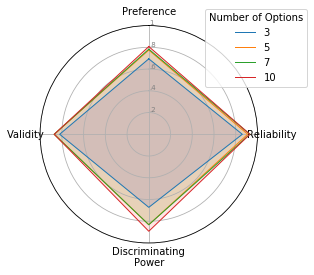

In [1737]:

# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
# df = pd.DataFrame({
# 'group': ['10','7','5','3'],
# 'Validity': [7.1, 7.2, 7.3, 6.5],
# 'Reliability': [.89, .89, .865, .825],
# 'Respondent\nPreference\n(Subjective)': [6.3, 6.8, 7.1, 7.9], 
# 'Discriminating\nPower': [9.1, 8.1, 7.8, 5.3]
# })
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.yticks([.2, .4, .6, .8, 1], [".2",".4",".6",".8","1"], color="grey", size=7)
plt.ylim(0,1)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[1].drop('scale_len').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="3")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[3].drop('scale_len').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="5")
ax.fill(angles, values, 'orange', alpha=0.1)

# Ind3
values=df.loc[5].drop('scale_len').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="7")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=df.loc[8].drop('scale_len').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="10")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), title='Number of Options')

# Show the graph
plt.show()

In [1195]:
values

[38.0, 29, 8, 7, 28, 38.0]